# Solanki, Shivam Homework 4

**Due Monday 1st April in class**

In this homework you will compute the posterior distribution for a Poisson likelihood with a gamma prior using:
* Model Conjugacy
* Numerical Integration
* Metropolis Hastings Algorithm

All of these methods should give the same answer (up to numerical approximation). In practice, one would use the conjugate model result to derive the posterior because this method is computationally fastest. However the  methods of numerical integration and Metropolis Hastings are more general in that they could be used on other, non-conjugate models. Metropolis Hastings is particularly useful because it can be used for problems where the parameter dimension is too high for direct numerical integration. 

## Problem 1

Suppose we observe $X_1,\ldots,X_n \sim \text{Pois}(\lambda)$ where $\text{Pois}(\lambda)$ denotes a Poisson distribution with mean parameter $\lambda$. Specifically
$$ P(X=x|\lambda)  = \frac{\lambda^x e^{-\lambda}}{x!}$$
for $x=0,1,\dots$. We put a $Gamma(\alpha,\beta)$ prior on $\lambda$, which we denote by $\pi(\lambda)$. This prior has the form
$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$$
for $\lambda > 0$. Recall that $\alpha, \beta > 0$ are fixed, known constants.

1. Using a few lines of algebra determine the posterior distribution.
2. Plot the Gamma prior probability density with $\alpha=3$, $\beta=1/2$ and plot the corresponding posterior density assuming $n=10$ and 
 $(x_1,\dots,x_n) = (4,5,1,3,3,1,4,5,0,5)$



Note: In python,`np.random.gamma` and `scipy.stats.gamma` use the scale parameterization. We use the rate parameterization: rate = 1/scale. R has options for both rate and scale parameterization in `rgamma`, `dgamma`, etc. See [here](https://en.wikipedia.org/wiki/Exponential_distribution) and [here](https://en.wikipedia.org/wiki/Gamma_distribution) for some discussion of different parameterizations.

## Answer 1
Sampling with Poisson distribution:

$$ P(X=x|\lambda)  = \frac{\lambda^x e^{-\lambda}}{x!}$$

Gamma Prior:
$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$$

Calculation posterior:
$$ P(\lambda|X=x) = \frac{P(\lambda) P(X=x|\lambda)}{P(X=x)}$$
                $$= \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda} \lambda^{\sum(x)} e^{-n\lambda} c(x_1,x_2,........x_n)$$ 
                $$= \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha+\sum(x)-1} e^{-(\beta+n)\lambda} c(x_1,x_2,........x_n)$$                
                $$ \sim gamma(\alpha+\sum(x_i), \beta+n)$$                

In [1]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [20]:
## get plot sizes reasonable
plt.rcParams['figure.figsize'] = (12, 4)

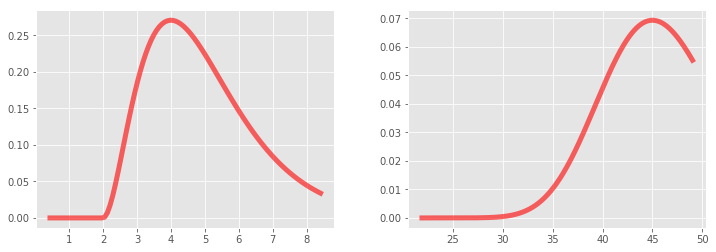

In [43]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

al = 3 # alpha parameter
be = 2 # 1/beta parameter since rate parameterization is to be used rather than scale parameterization
p = np.linspace(gamma.ppf(0.01, al),
               gamma.ppf(0.99, al), 100)

# plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(p, gamma.pdf(p, al, be),
         'r-', lw=5, alpha=0.6, label='Gamma pdf')


# Plot the posterior
n = 10
X_i = [4,5,1,3,3,1,4,5,0,5]
x = sum(X_i)
b = 2 + n
a = 3 + x
p = np.linspace(gamma.ppf(0.01, a),
               gamma.ppf(0.99, a), 1000)
ax = fig.add_subplot(1, 2, 2)
ax.plot(p, gamma.pdf(p, a, b),
         'r-', lw=5, alpha=0.6, label='Gamma pdf')

## Problem 2

Recall that the posterior is proportional to the likelihood times the prior
$$ \pi(\lambda|x) \propto f(x|\lambda)\pi(\lambda)$$
Here $x=(x_1,\ldots,x_n)$ and $f(x|\lambda) = \lambda^{\sum_i x_i} e^{-n\lambda}/(\prod_i x_i!)$ is the joint probability density function, i.e., the likelihood when viewed as a function of $\lambda$. Plot $f(x|\lambda)\pi(\lambda)$ (or something proportional to it) for the $Gamma(\alpha=3,\beta=1/2)$ prior and data from the previous question. Numerically integrate this function and use the result to normalize $f(x|\lambda)\pi(\lambda)$. Verify that the result matches the posterior you found in Problem 1.

## Answer2

In [40]:
px = np.linspace(gamma.ppf(0.01, al),
               gamma.ppf(0.99, al), 100)
def posterior_propto(p,al,be):
    return gamma.pdf(p, al+x, be+n)

In [44]:
px = np.linspace(gamma.ppf(0.01, al),
               gamma.ppf(0.99, al), 100)
gamma.pdf(p, al+x, be+n)

array([4.33516029e-09, 4.61701083e-09, 4.91597941e-09, 5.23302999e-09,
       5.56917638e-09, 5.92548458e-09, 6.30307518e-09, 6.70312591e-09,
       7.12687430e-09, 7.57562037e-09, 8.05072955e-09, 8.55363559e-09,
       9.08584369e-09, 9.64893372e-09, 1.02445635e-08, 1.08744724e-08,
       1.15404848e-08, 1.22445140e-08, 1.29885659e-08, 1.37747433e-08,
       1.46052499e-08, 1.54823948e-08, 1.64085971e-08, 1.73863903e-08,
       1.84184275e-08, 1.95074861e-08, 2.06564737e-08, 2.18684327e-08,
       2.31465466e-08, 2.44941455e-08, 2.59147125e-08, 2.74118895e-08,
       2.89894840e-08, 3.06514761e-08, 3.24020247e-08, 3.42454757e-08,
       3.61863686e-08, 3.82294448e-08, 4.03796555e-08, 4.26421699e-08,
       4.50223835e-08, 4.75259276e-08, 5.01586779e-08, 5.29267642e-08,
       5.58365802e-08, 5.88947935e-08, 6.21083560e-08, 6.54845151e-08,
       6.90308241e-08, 7.27551545e-08, 7.66657073e-08, 8.07710253e-08,
       8.50800063e-08, 8.96019154e-08, 9.43463989e-08, 9.93234981e-08,
      

Defining the maximum

In [47]:

fmax = np.max(posterior_propto(px,3,2))
print(fmax)

0.0


In [24]:
import scipy.integrate as integrate

In [25]:
mx = integrate.quad(lambda p: posterior_propto(p,3,2), 0, 1)

In [26]:
mx

(0.0, 0.0)

In [27]:
mx = mx[0]
mx

0.0

## Problem 3

Write (or adapt code from class) a Metropolis Hastings algorithm to sample from the posterior. Draw a histogram of the samples and verify that they approximately match the posterior determined using conjugacy or numerical integration. Compute the posterior mean and make a 95% credible interval for $\lambda$ (you can make this interval in many ways, but the most popular method is to compute the 0.025 and .975 quantiles of the posterior samples). You can verify that you have the right answer by computing the interval from the conjugacy result in Problem 1.